  Gender  ApplicantIncome
0    NaN           5849.0
1   Male           4583.0
2   Male           3000.0


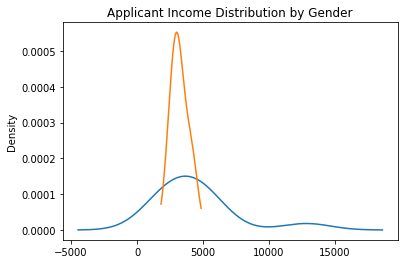

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            16 non-null     object 
 1   Gender             16 non-null     object 
 2   ApplicantIncome    16 non-null     float64
 3   CoapplicantIncome  16 non-null     float64
 4   LoanAmount         16 non-null     float64
 5   Area               16 non-null     object 
 6   Loan_Status        16 non-null     object 
dtypes: float64(3), object(4)
memory usage: 1.0+ KB


In [8]:
#loads a CSV file, adds headers, adds a couple of columns to the dataset, then does a groupby (like a pivot table)

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

data_folder = "C:\\Users\\elidmoore\\Documents\Personal Documents\\Data Science 2021 Course\\004 - Data Preprocessing\\"
file_to_open = data_folder + "loan_small.CSV"
df = open(file_to_open)
data = pd.read_csv(df)

#read top 5 rows
data.head()

#access the dataframe data using iloc, gives you the data in a specified range (column 0 through row 3, column 1 through row 3)
subset = data.iloc[0:3, 1:3]

print(subset)

#Read txt file using pandas
new_file = data_folder + "loan_small_tsv.txt"
dataset_t = pd.read_csv(open(new_file), sep='\t')
dataset_t.head()

#name all the columns
dataset_t.columns

#copies the dataset
dt = data.copy()

#find out the columns w/ missing values
data.isnull().sum(axis=0)

#drop the rows with the missing values
cleandata = data.dropna()

#shows that there are no more rows w/ missing values
cleandata.isnull().sum(axis=0)

#suppose you want to replace null values with the mode
cols = ['Gender', 'Area', 'Loan_Status']
dt[cols] = dt[cols].fillna(dt.mode().iloc[0])
dt.isnull().sum(axis=0)

#replace numerical values with mean
cols2 = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
dt[cols2] = dt[cols2].fillna(dt.mean().iloc[0])
dt.isnull().sum(axis=0)

#identify type of data
dt.dtypes

#change the datatypes from object to category and then convert to numerical labels if you wanted
#dt[cols] = dt[cols].astype('category')
#
#for columns in cols:
#    dt[columns] = dt[columns].cat.codes
    
#one hot end coding, convert categorical data to new binary columns for regression
dt_encoded = pd.get_dummies(dt, columns=['Gender','Area','Loan_Status'])
dt_encoded.head()
dt.head()

#create normalized version of data puts into numpy series
from sklearn.preprocessing import StandardScaler
data_to_scale = dt[['ApplicantIncome','CoapplicantIncome','LoanAmount']]
data_to_scale.head()
scaler_variable = StandardScaler()
ss_scaler = scaler_variable.fit_transform(data_to_scale)

#converts numpy array into datafram
scaler_df = pd.DataFrame(ss_scaler)
scaler_df.head()

#scale between 0 and 1
from sklearn.preprocessing import minmax_scale
mm_scaler = minmax_scale(data_to_scale)
mm_scaler_df = pd.DataFrame(mm_scaler)
mm_scaler_df.head()


#split t he ata vertically into X and Y
X = dt.iloc[:, :-1] #select all the columns except last one
Y = dt.iloc[:, -1]  #select only the last column

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = \
    train_test_split(X, Y, test_size=0.2, random_state=1234)

#groupby basically create a pivot table
dt.groupby(['Gender'])['ApplicantIncome'].mean()

#create kernel density chart
for x in ['Male','Female']:
    dt.ApplicantIncome[dt.Gender==x].plot(kind="kde")
    
plt.title("Applicant Income Distribution by Gender")
plt.show()